# Wiki Networking - Extended Example

### Introduction

Network graphs consisting of nodes and edges and be used to visualize the relationships between people. The results can inform a viewer of groups of relationships. This notebook has examples for all functions available and a variety of text mining examples. It demonstrates how to crawl Wiki articles and represent the links between these articles as a graph.

### `import` statements

First, we will import a few necessary packages, including `wikinetworking` from this repository. It includes functions for crawling and text mining Wiki data as well as graphing the result of the crawl.

In [1]:
import wikinetworking as wn
import networkx as nx
from pyquery import PyQuery
%matplotlib inline

print "OK"

OK


### `filter_links`

This function accepts a PyQuery object and returns a list of Wikipedia article links from the article's main body text. It will not return links that are redirects or links that are anchors within other pages. Optionally, you can specify a DOM selector for the type of element containing links you wish to retrieve.

In this example, we create a PyQuery object for the [Iron Man](https://en.wikipedia.org/wiki/Iron_Man) article on Wikipedia, retrieve its links with `filter_links` and output the number of links we retrieved.

In [2]:
iron_man_page = PyQuery(url="https://en.wikipedia.org/wiki/Iron_man")
iron_man_links = wn.filter_links(iron_man_page)
print len(iron_man_links), "links retrieved"

1205 links retrieved


In this example, we retrieve links from a [list of Hip Hop musicians](https://en.wikipedia.org/wiki/List_of_hip_hop_musicians). Notice that each link is contained inside of a `li` list item HTML tag.

In [3]:
hip_hop_page = PyQuery(url="https://en.wikipedia.org/wiki/List_of_hip_hop_musicians")
hip_hop_links = wn.filter_links(hip_hop_page, "li")
print len(hip_hop_links), "links retrieved"

1113 links retrieved


In this example, we do the same thing for [Harry Potter Characters](https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters). Notice that many links are omitted - these links are redirects or links to sections within larger articles.

In [4]:
harry_potter_page = PyQuery(url="https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters")
harry_potter_links = wn.filter_links(harry_potter_page, "li")
print len(harry_potter_links), "links retrieved"

144 links retrieved


In this example, we are retrieving a list of [Marvel Comics Characters beginning with the letter D](https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_D). In this case, we specify the DOM selector `.hatnote`. This is because we only want links for Marvel characters that have a dedicated _*Main article*_. The _*Main article*_ elements all have the `.hatnote` CSS class, so it is an easy way of selecting these articles. In this example, we simply print the contents of the list.

In [5]:
marvel_d_page = PyQuery(url="https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_D")
marvel_d_links = wn.filter_links(marvel_d_page, ".hatnote")
print marvel_d_links

['/wiki/Daken', '/wiki/Dakimh_the_Enchanter', '/wiki/Randall_Darby', '/wiki/Daredevil_(Marvel_Comics_character)', '/wiki/Dark_Beast', '/wiki/Dark_Mother', '/wiki/Darkdevil', '/wiki/Darkhawk', '/wiki/Darkoth', '/wiki/Darkstar_(comics)', '/wiki/Darwin_(comics)', '/wiki/Amanda_Sefton', '/wiki/Dazzler', '/wiki/Deacon_(comics)', '/wiki/Deadpool', '/wiki/Death_(Marvel_Comics)', '/wiki/Death_Adder_(comics)', '/wiki/Death_Metal_(comics)', '/wiki/Death-Stalker', '/wiki/Death%27s_Head', '/wiki/Deathbird', '/wiki/Deathlok', '/wiki/Death_Locket', '/wiki/Deathurge', '/wiki/Deathwatch_(comics)', '/wiki/Debrii', '/wiki/Valentina_Allegra_de_Fontaine', '/wiki/Marco_Delgado_(comics)', '/wiki/Marvel_Comics', '/wiki/DC_Comics', '/wiki/Demogoblin', '/wiki/Demolition_Man_(comics)', '/wiki/Demon_Bear', '/wiki/Desak', '/wiki/Destiny_(Irene_Adler)', '/wiki/Destiny_(Marvel_Comics_personification)', '/wiki/Destroyer_(Thor)', '/wiki/Devastator_(comics)', '/wiki/Devil_Dinosaur', '/wiki/Devos_the_Devastator', '/wik

### `retrieve_multipage`

This function retrieves data from a list of URLs. This is useful for when data on a Wikipedia category is broken up into multiple individual pages.

In this example, we are retrieving lists from all subpages from the [List of Marvel Comics Characters](https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters). The URL pattern for these articles is `https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_` followed by a section name.

In [6]:
sections = [letter for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ']
sections.append('0-9')
urls = ["https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_" + section for section in sections]
print "URLs:", urls

character_links = wn.retrieve_multipage(urls, ".hatnote", True)
print len(character_links), "links retrieved"

URLs: ['https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_A', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_B', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_C', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_D', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_E', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_F', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_G', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_H', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_I', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_J', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_K', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_L', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_M', 'https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_N', 'https://en.wikipedia.org/w

### `write_list` and `read_list`

These are convenience functions for writing and reading list data.

In this example, we write all of the Marvel character links we retrieved to a text file, and verify that we can read the data from the file.

In [7]:
wn.write_list(character_links, "all_marvel_chars.txt")
print len(wn.read_list("all_marvel_chars.txt")), "read"

2042 read


### `intersection`

Returns a list of elements that appear in both provided lists

The `intersection` function is useful for cross referencing links from one Wikipedia page with another. For example, the [List of Hip Hop Musicians](https://en.wikipedia.org/wiki/List_of_hip_hop_musicians) contains many musicians, but we may not have the time or resources to crawl every single artist. The [BET Hip Hop Awards page](https://en.wikipedia.org/wiki/BET_Hip_Hop_Awards) has links to artists that have won an award and may be significant for our search, but it also contains links to songs and other media that may not be articles about individual Hip Hop artists. By taking the `intersection` of both, we get a list containing links of only Hip Hop arists that have won a BET Hip Hop Award.

In [8]:
hip_hop_page = PyQuery(url="https://en.wikipedia.org/wiki/List_of_hip_hop_musicians")
hip_hop_links = wn.filter_links(hip_hop_page, "li")
print len(hip_hop_links), "links retrieved from List of Hip Hop Musicians"

bet_hip_hop_awards_page = PyQuery(url="https://en.wikipedia.org/wiki/BET_Hip_Hop_Awards")
bet_hip_hop_awards_links = wn.filter_links(bet_hip_hop_awards_page, "li")
print len(bet_hip_hop_awards_links), "links retrieved from BET Hip Hop Awards"

award_winner_links = wn.intersection(hip_hop_links, bet_hip_hop_awards_links)

print "BET Hip Hop Award winners:", award_winner_links

1113 links retrieved from List of Hip Hop Musicians
705 links retrieved from BET Hip Hop Awards
BET Hip Hop Award winners: ['/wiki/Jadakiss', '/wiki/Problem_(rapper)', '/wiki/Rapsody', '/wiki/B.o.B', '/wiki/Juicy_J', '/wiki/Schoolboy_Q', '/wiki/Gucci_Mane', '/wiki/Tech_N9ne', '/wiki/Jim_Jones_(rapper)', '/wiki/Black_Thought', '/wiki/Joe_Budden', '/wiki/Lil_Yachty', '/wiki/Unk', '/wiki/Keith_Murray_(rapper)', '/wiki/Angel_Haze', '/wiki/50_Cent', '/wiki/B.G._(rapper)', '/wiki/Stat_Quo', '/wiki/Jay_Electronica', '/wiki/Mystikal', '/wiki/Birdman_(rapper)', '/wiki/Snow_Tha_Product', '/wiki/Desiigner', '/wiki/Rich_Homie_Quan', '/wiki/Metro_Boomin', '/wiki/Shawty_Lo', '/wiki/Buckshot_(rapper)', '/wiki/Swizz_Beatz', '/wiki/Mac_Miller', '/wiki/Lil_Uzi_Vert', '/wiki/Big_Sean', '/wiki/Rahzel', '/wiki/Vic_Mensa', '/wiki/Kardinal_Offishall', '/wiki/21_Savage', '/wiki/Daveed_Diggs', '/wiki/Andy_Mineo', '/wiki/Mike_Zombie', '/wiki/Cory_Gunz', '/wiki/The_Game_(rapper)', '/wiki/Tiffany_Foxx', '/wiki/Ch

### `crawl`

This crawls articles iteratively, with a two second delay between each page retrieval. It requires a starting URL fragment and an `accept` list of URLs the crawler should follow. It returns a dictionary structure with each URL fragment as a key and crawl data (`links`, `title` and `depth`) as a value.

In this example, we start a crawl at the article for [Jadakiss](https://en.wikipedia.org/wiki/Jadakiss). As the `accept` list of URLs that the crawler is allowed to follow, we will use the `award_winner_links` list from earlier. This isolates the crawl to only [Artist winners of BET Hip Hop Awards](https://en.wikipedia.org/wiki/BET_Hip_Hop_Awards). Therefore, our social network will be a network built of BET Hip Hop Award Winners and stored in the `bet_winner_crawl` dictionary.

In [9]:
bet_winner_crawl = wn.crawl("/wiki/Jadakiss", accept=award_winner_links)

1: Retrieving /wiki/Jadakiss, (0 left in queue)
2: Retrieving /wiki/DMX_(rapper), (28 left in queue)
3: Retrieving /wiki/Pharrell_Williams, (30 left in queue)
4: Retrieving /wiki/Swizz_Beatz, (38 left in queue)
5: Retrieving /wiki/Yo_Gotti, (40 left in queue)
6: Retrieving /wiki/Rick_Ross, (42 left in queue)
7: Retrieving /wiki/Fat_Joe, (49 left in queue)
8: Retrieving /wiki/DJ_Khaled, (55 left in queue)
9: Retrieving /wiki/Nicki_Minaj, (65 left in queue)
10: Retrieving /wiki/Styles_P, (65 left in queue)
11: Retrieving /wiki/Sean_Combs, (64 left in queue)
12: Retrieving /wiki/Snoop_Dogg, (63 left in queue)
13: Retrieving /wiki/Eminem, (69 left in queue)
14: Retrieving /wiki/Common_(rapper), (80 left in queue)
15: Retrieving /wiki/Nas, (83 left in queue)
16: Retrieving /wiki/Beanie_Sigel, (84 left in queue)
17: Retrieving /wiki/Freeway_(rapper), (84 left in queue)
18: Retrieving /wiki/Fabolous, (83 left in queue)
19: Retrieving /wiki/Ludacris, (83 left in queue)
20: Retrieving /wiki/Bus

In [10]:
print bet_winner_crawl

{'/wiki/Jadakiss': {'depth': 0, 'links': ['/wiki/DMX_(rapper)', '/wiki/Pharrell_Williams', '/wiki/Swizz_Beatz', '/wiki/Yo_Gotti', '/wiki/Rick_Ross', '/wiki/Fat_Joe', '/wiki/DJ_Khaled', '/wiki/Nicki_Minaj', '/wiki/DMX_(rapper)', '/wiki/Styles_P', '/wiki/Sean_Combs', '/wiki/DMX_(rapper)', '/wiki/Snoop_Dogg', '/wiki/Swizz_Beatz', '/wiki/Styles_P', '/wiki/Eminem', '/wiki/Styles_P', '/wiki/Common_(rapper)', '/wiki/Nas', '/wiki/Beanie_Sigel', '/wiki/DJ_Khaled', '/wiki/Freeway_(rapper)', '/wiki/Beanie_Sigel', '/wiki/Swizz_Beatz', '/wiki/Fabolous', '/wiki/Ludacris', '/wiki/Busta_Rhymes', '/wiki/Twista', '/wiki/Ace_Hood', '/wiki/Fat_Joe', '/wiki/Bun_B', '/wiki/Waka_Flocka_Flame', '/wiki/The-Dream', '/wiki/Young_Jeezy', '/wiki/Wiz_Khalifa', '/wiki/Rick_Ross', '/wiki/Lil_Wayne', '/wiki/Yo_Gotti', '/wiki/Fabolous', '/wiki/Future_(rapper)', '/wiki/Styles_P', '/wiki/Fat_Joe', '/wiki/50_Cent', '/wiki/Styles_P'], 'title': 'Jadakiss'}, '/wiki/Problem_(rapper)': {'depth': 3, 'links': ['/wiki/E-40', '/wi

### `directed_graph` and `undirected_graph`

These functions flatten the raw crawl data into something a little more usable. It returns a dictionary with only article title names as the key, and corresponding urls and a dictionary of edges and weights to each article. The `directed_graph` function allows each article to retain a separate edge representing back links, while the `undirected_graph` creates one edge from each pair of article where the weight is a sum of the links between each article. For example, `directed_graph` might produce:

```
{
   'Iron Man' : {
       'url' : '/wiki/Iron_Man',
       'edges' : {
           'Captain America' : 11
       }
   },
   'Captain America' : {
       'url' : '/wiki/Captain_America',
       'edges' : {
           'Iron Man' : 8
       }
   }
}
```

...while the same data passed to `undirected_graph` might produce:


```
{
    'Iron Man' : {
        'url' : '/wiki/Iron_Man',
        'edges' : {
            'Captain America' : 19
        }
    },
    'Captain America' : {
        'url' : /wiki/Captain_America',
        'edges' : {
        }
    }
}
```

In [11]:
bet_directed_graph_data = wn.directed_graph(bet_winner_crawl)
print bet_directed_graph_data

{'Mannie Fresh': {'url': '/wiki/Mannie_Fresh', 'edges': {'Lil Wayne': 2, 'B.G. (rapper)': 1, 'Mos Def': 1, 'Juvenile (rapper)': 1, 'Rick Ross': 1, 'Birdman (rapper)': 3, 'Lil Jon': 1, 'T.I.': 1, 'Mystikal': 1}}, 'Beanie Sigel': {'url': '/wiki/Beanie_Sigel', 'edges': {'Kanye West': 1, 'Jadakiss': 3, 'DMX (rapper)': 1, '50 Cent': 2, 'Raekwon': 1, 'Freeway (rapper)': 4, 'Omillio Sparks': 2, 'Meek Mill': 1, 'Scarface (rapper)': 2}}, 'Nipsey Hussle': {'url': '/wiki/Nipsey_Hussle', 'edges': {'Problem (rapper)': 1, 'Dom Kennedy': 3, 'DJ Drama': 1, 'Jay Rock': 1, 'YG (rapper)': 3, 'Rick Ross': 3, 'Freeway (rapper)': 1, 'Big Sean': 1, 'Dr. Dre': 1, 'DJ Mustard': 1, 'Tyga': 1, 'Snoop Dogg': 2}}, 'Nicki Minaj': {'url': '/wiki/Nicki_Minaj', 'edges': {'Lil Wayne': 6, 'Kanye West': 3, 'Busta Rhymes': 1, 'Remy Ma': 3, 'Ludacris': 1, 'Jadakiss': 1, 'Eminem': 2, 'Birdman (rapper)': 1, 'Yo Gotti': 2, 'Meek Mill': 2, 'Big Sean': 1, 'Ice Cube': 1, 'Tyga': 1, 'Gucci Mane': 1, "Lil' Kim": 3}}, 'Charles Hami

In [12]:
bet_undirected_graph_data = wn.undirected_graph(bet_winner_crawl)
print bet_undirected_graph_data

{'Mannie Fresh': {'url': '/wiki/Mannie_Fresh', 'edges': {'Rick Ross': 1, 'Lil Jon': 1}}, 'Beanie Sigel': {'url': '/wiki/Beanie_Sigel', 'edges': {'DMX (rapper)': 1, '50 Cent': 2, 'Meek Mill': 2}}, 'Nipsey Hussle': {'url': '/wiki/Nipsey_Hussle', 'edges': {'Dr. Dre': 1, 'DJ Drama': 1, 'Jay Rock': 2, 'YG (rapper)': 5, 'Rick Ross': 3, 'Freeway (rapper)': 1, 'Big Sean': 1, 'Tyga': 1, 'Snoop Dogg': 2}}, 'Nicki Minaj': {'url': '/wiki/Nicki_Minaj', 'edges': {'Lil Wayne': 8, 'Busta Rhymes': 3, 'Remy Ma': 4, 'Ludacris': 1, 'Eminem': 4, 'Yo Gotti': 3, 'Meek Mill': 6, 'Ice Cube': 1, 'Tyga': 3}}, 'Charles Hamilton (rapper)': {'url': '/wiki/Charles_Hamilton_(rapper)', 'edges': {'Ace Hood': 1, 'Cory Gunz': 1, 'Kanye West': 1, 'Dr. Dre': 2, 'Wale (rapper)': 1, 'DMX (rapper)': 1, 'MC Lyte': 2, '50 Cent': 1, 'Eminem': 4, 'Nas': 1, 'The-Dream': 1, 'Mickey Factz': 2, 'Lupe Fiasco': 2}}, 'Jermaine Dupri': {'url': '/wiki/Jermaine_Dupri', 'edges': {'Lil Wayne': 1, 'Ludacris': 1, 'Queen Latifah': 1, 'Nelly': 4

### `save_dict` and `load_dict`

These functions save and load Python dictionaries. This is convenient when you want to save crawl data.

In [13]:
wn.save_dict(bet_undirected_graph_data, "bet_network.json")
print wn.load_dict("bet_network.json")

{u'Mannie Fresh': {u'url': u'/wiki/Mannie_Fresh', u'edges': {u'Rick Ross': 1, u'Lil Jon': 1}}, u'Beanie Sigel': {u'url': u'/wiki/Beanie_Sigel', u'edges': {u'DMX (rapper)': 1, u'50 Cent': 2, u'Meek Mill': 2}}, u'Nipsey Hussle': {u'url': u'/wiki/Nipsey_Hussle', u'edges': {u'Dr. Dre': 1, u'Big Sean': 1, u'Jay Rock': 2, u'YG (rapper)': 5, u'Rick Ross': 3, u'Freeway (rapper)': 1, u'DJ Drama': 1, u'Tyga': 1, u'Snoop Dogg': 2}}, u'Nicki Minaj': {u'url': u'/wiki/Nicki_Minaj', u'edges': {u'Lil Wayne': 8, u'Busta Rhymes': 3, u'Remy Ma': 4, u'Ludacris': 1, u'Eminem': 4, u'Yo Gotti': 3, u'Meek Mill': 6, u'Ice Cube': 1, u'Tyga': 3}}, u'Charles Hamilton (rapper)': {u'url': u'/wiki/Charles_Hamilton_(rapper)', u'edges': {u'Ace Hood': 1, u'Cory Gunz': 1, u'Kanye West': 1, u'Dr. Dre': 2, u'Wale (rapper)': 1, u'DMX (rapper)': 1, u'MC Lyte': 2, u'50 Cent': 1, u'Eminem': 4, u'Nas': 1, u'Lupe Fiasco': 2, u'Mickey Factz': 2, u'The-Dream': 1}}, u'Jermaine Dupri': {u'url': u'/wiki/Jermaine_Dupri', u'edges': {u

### `create_graph`

Now that we have a dictionary representing an undirected graph, we need to turn it into a `networkx.graph` object which can be drawn. Optionally, we can pre-generate a node layout and save it.

In [1]:
# Just in case we don't want to re-run the crawl, we will load the data directly
import wikinetworking as wn
import networkx as nx
%matplotlib inline
bet_undirected_graph_data = wn.load_dict("bet_network.json")

# Now create the graph
graph = wn.create_graph(bet_undirected_graph_data)
layout = nx.spring_layout(graph)

### `make_interactive_graph`


The `networkx.graph` object can be rendered as an interactive, clickable graph.

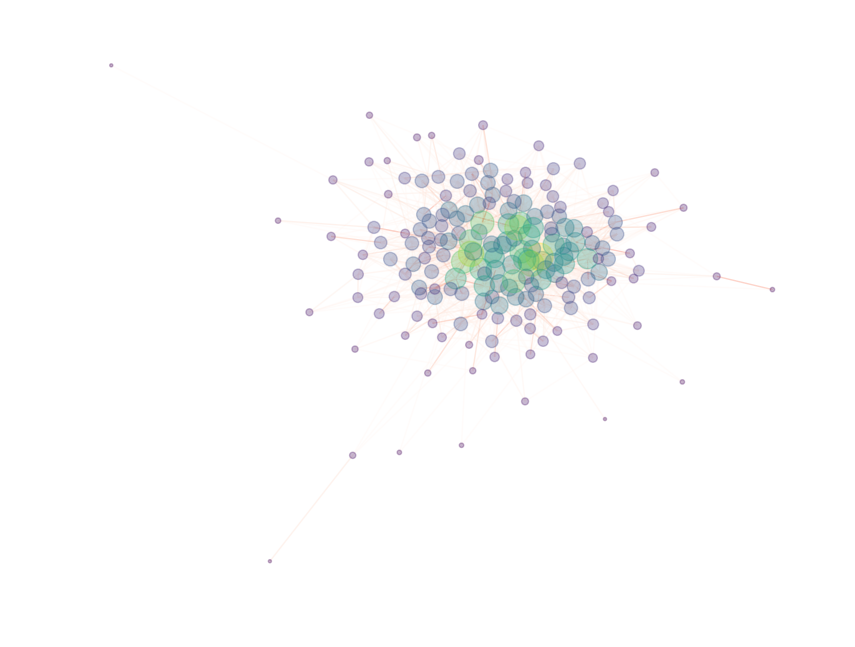

In [5]:
graph_html = wn.make_interactive_graph(graph, pos=layout)

You can save the resulting HTML of the interactive graph to a file, if you wish to load it outside of this notebook.

In [7]:
with open("bet_network.html", "w") as f:
    f.write(graph_html)
    f.close()

### `save_big_graph`

If you would like to save a very high resolution version of this graph for use on a display system like [Texas Advanced Computing Center's Stallion](https://www.tacc.utexas.edu/vislab/stallion), you can use the `save_big_graph` function. The default output size at 600dpi will be 4800x3600 pixels. Warning: This function can take a little while to run.

In [ ]:
wn.save_big_graph(graph, pos=layout)